## Иерархическое обучение с подкреплением на примере задачи Taxi

In [1]:
import gym
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

%matplotlib inline

env = gym.make('Taxi-v2')   # taxi environment 

### Алгоритм Q-learning

In [2]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
G = 0
decay_rate = 0.999
eps = 0.001
eps_decay = 0.9999
gamma = 0.99
rewards_q = []
max_steps = 500
step = 0
for episode in range(1,2001):
    alpha = 0.618 # learning rate
    done = False
    step = 0
    state = env.reset()
    while done != True and step <= max_steps:
        if random.random() < eps:
            action = random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state]) # выбираем действие с наиболее высоким Q-val для данного состояния
        state2, reward, done, info = env.step(action)
        Q[state,action] += alpha * (gamma * reward + np.max(Q[state2]) - Q[state,action])
        G += reward
        eps *= eps_decay
        alpha *= decay_rate
        state = state2
        step += 1
    if episode % 50 == 0:
        rewards_q.append(G)
        print('Episode {} Mean reward (50 steps): {:.2f}'.format(episode, G / 50))
        G = 0

Episode 50 Mean reward (50 steps): -298.94
Episode 100 Mean reward (50 steps): -84.36
Episode 150 Mean reward (50 steps): -75.18
Episode 200 Mean reward (50 steps): -48.76
Episode 250 Mean reward (50 steps): -11.90
Episode 300 Mean reward (50 steps): 1.38
Episode 350 Mean reward (50 steps): 4.76
Episode 400 Mean reward (50 steps): 5.84
Episode 450 Mean reward (50 steps): 6.44
Episode 500 Mean reward (50 steps): 4.62
Episode 550 Mean reward (50 steps): 8.56
Episode 600 Mean reward (50 steps): 7.70
Episode 650 Mean reward (50 steps): 8.34
Episode 700 Mean reward (50 steps): 7.28
Episode 750 Mean reward (50 steps): 8.20
Episode 800 Mean reward (50 steps): 7.94
Episode 850 Mean reward (50 steps): 8.56
Episode 900 Mean reward (50 steps): 8.38
Episode 950 Mean reward (50 steps): 8.12
Episode 1000 Mean reward (50 steps): 8.40
Episode 1050 Mean reward (50 steps): 7.94
Episode 1100 Mean reward (50 steps): 8.22
Episode 1150 Mean reward (50 steps): 8.46
Episode 1200 Mean reward (50 steps): 8.12
E

### Алгоритм MAXQ-0

In [3]:
def maxQ_0(i, s, alpha, step):
    '''
    input: i - MaxNode number, s - state, alpha - learning rate, step - step in episode
    output: number of steps performed
    '''
    global done, R, epsilon

    if i >= 5:
        step += 1
        epsilon *= eps_decay
        _, r, done, _ = env.step(i - 5)
        R += r
        V[i][s] += alpha * (r - V[i][s])
        return 1
    else:
        count = 0
        while T(i, s) == False and step < max_steps:
            a = Pi(i, s)
            N = maxQ_0(a, s, alpha * decay_rate, step)
            obs = env.env.s
            v, _ = evaluateMaxNode(i, obs)
            C[i][s][a] += alpha * (gamma ** N * v - C[i][s][a])
            count += N
            s = obs
        return count 

In [4]:
def evaluateMaxNode(i, s):
    '''
    input: i - MaxNode number, s - state
    output: V[i][s]
    '''
    if i >= 5:
        return V[i][s], i
    else:
        j_argmax = 0
        cur_max = -10000
        for j in range(len(A[i])):
            a = A[i][j]
            v, _ = evaluateMaxNode(a, s)
            if v + C[i][s][a] > cur_max:
                j_argmax = j
                cur_max = v + C[i][s][a]
        return cur_max, j_argmax

In [5]:
def Pi(i, s):
    '''
    input: i - MaxNode number, s - state
    output: action on e-greedy strategy
    '''
    _, j_argmax = evaluateMaxNode(i, s)
    if random.random() < epsilon:
        return np.random.choice(A[i])
    return A[i][j_argmax]

In [6]:
def T(i, s):
    '''
    input: i - MaxNode number, s - state
    output: is state s terminal
    '''
    taxirow, taxicol, passloc, destidx = env.env.decode(s)
    if i == 0:
        return done
    if i == 1:
        return passloc == 4
    if i == 2:
        return passloc != 4 or done
    if i == 3:
        return env.env.locs[passloc] == (taxirow, taxicol)
    if i == 4:
        return env.env.locs[destidx] == (taxirow, taxicol)

In [7]:
random.seed(57)

decay_rate = 0.999    # learning rate decay coefficient
gamma = 0.99          # discount
alpha = 0.618         # learning rate
epsilon = 0.1         # e for e-greedy
num_episodes = 2000
max_steps = 500

MaxNodes = ["Root", "Get", "Put", "NavigateS", "NavigateD", "South", "North", "East", "West", "Pickup", "Dropoff"]
f = len(MaxNodes)
C = -random.random((5, 500, f))
V = np.zeros((f, 500))
A = [[1, 2],
    [3, f - 2],
    [4, f - 1],
    [5, 6, 7, 8],
    [5, 6, 7, 8]]

R = 0
rewards_maxq = []
for i in range(1, num_episodes + 1):
    done = False
    start = env.reset()
    maxQ_0(0, start, alpha, 0)
    if i % 50 == 0:
        rewards_maxq.append(R)
        print("step {}, Mean reward (50 steps) {:.2f}".format(i, R / 50))
        R = 0

step 50, Mean reward (50 steps) -99.10
step 100, Mean reward (50 steps) -29.58
step 150, Mean reward (50 steps) -22.20
step 200, Mean reward (50 steps) -9.58
step 250, Mean reward (50 steps) -3.38
step 300, Mean reward (50 steps) -3.22
step 350, Mean reward (50 steps) -0.56
step 400, Mean reward (50 steps) 1.58
step 450, Mean reward (50 steps) 3.22
step 500, Mean reward (50 steps) 4.84
step 550, Mean reward (50 steps) 2.70
step 600, Mean reward (50 steps) 5.90
step 650, Mean reward (50 steps) 5.44
step 700, Mean reward (50 steps) 4.98
step 750, Mean reward (50 steps) 6.40
step 800, Mean reward (50 steps) 6.46
step 850, Mean reward (50 steps) 7.54
step 900, Mean reward (50 steps) 7.02
step 950, Mean reward (50 steps) 7.36
step 1000, Mean reward (50 steps) 6.08
step 1050, Mean reward (50 steps) 7.22
step 1100, Mean reward (50 steps) 7.24
step 1150, Mean reward (50 steps) 7.66
step 1200, Mean reward (50 steps) 7.54
step 1250, Mean reward (50 steps) 8.10
step 1300, Mean reward (50 steps) 7

### Сравнение сходимости алгоритмов

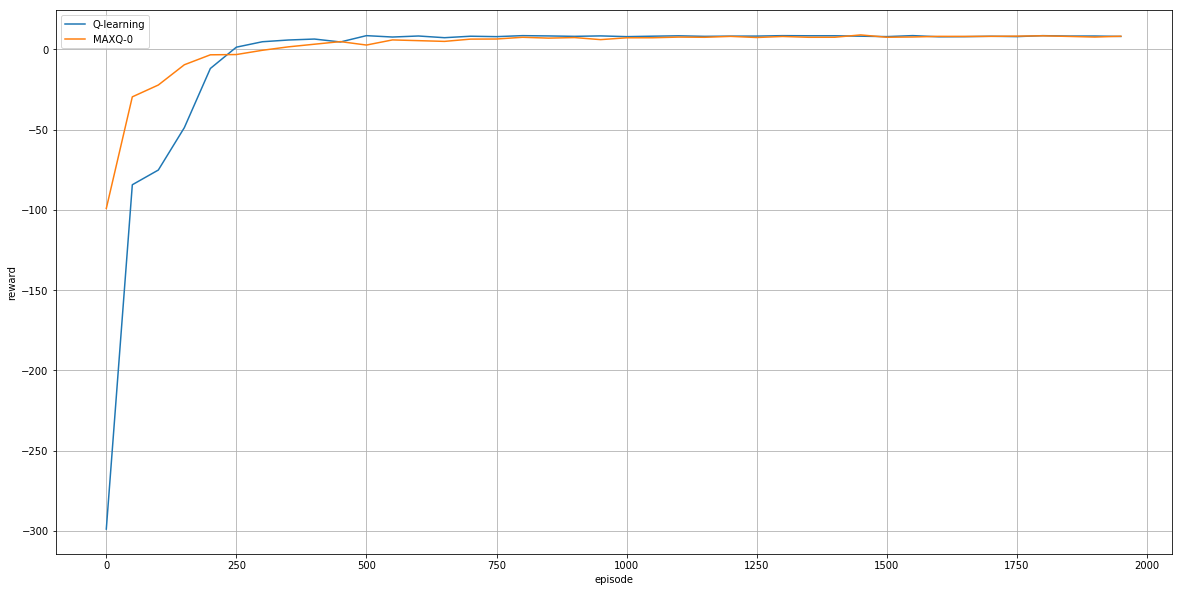

In [8]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(40) * 50, np.array(rewards_q) / 50, label='Q-learning')
plt.plot(np.arange(40) * 50, np.array(rewards_maxq) / 50, label='MAXQ-0')
plt.legend()
plt.xlabel("episode")
plt.ylabel("reward")
plt.grid()
plt.show()